In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pathlib import Path

In [5]:
dfs = {}

for file in Path(".").glob("*.csv"):
    print(f"Loading {file.name}")
    s = file.name.split('_')[0]
    dfs[s] = pd.read_csv(file.name)
    dfs[s]['Datetime'] = pd.to_datetime(dfs[s]['Datetime'])

Loading PJME_hourly.csv
Loading DOM_hourly.csv
Loading pjm_hourly_est.csv
Loading PJMW_hourly.csv
Loading COMED_hourly.csv
Loading AEP_hourly.csv
Loading PJM_Load_hourly.csv
Loading EKPC_hourly.csv
Loading FE_hourly.csv
Loading NI_hourly.csv
Loading DAYTON_hourly.csv
Loading DEOK_hourly.csv
Loading DUQ_hourly.csv


In [9]:
to_concat = []
for name, df in dfs.items():
    if (name + '_MW') in df:
        c = df.copy()
        c['Provider'] = name
        to_concat.append(c)
dfs['ALL'] = pd.concat(to_concat)
dfs['ALL']

,Datetime,PJME_MW,Provider,DOM_MW,PJMW_MW,COMED_MW,AEP_MW,EKPC_MW,FE_MW,NI_MW,DAYTON_MW,DEOK_MW,DUQ_MW
0,2002-12-31 01:00:00,26498.0,PJME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-12-31 02:00:00,25147.0,PJME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-12-31 03:00:00,24574.0,PJME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002-12-31 04:00:00,24393.0,PJME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002-12-31 05:00:00,24860.0,PJME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119063,2018-01-01 20:00:00,NaN,DUQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962.0
119064,2018-01-01 21:00:00,NaN,DUQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1940.0
119065,2018-01-01 22:00:00,NaN,DUQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1891.0
119066,2018-01-01 23:00:00,NaN,DUQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1820.0


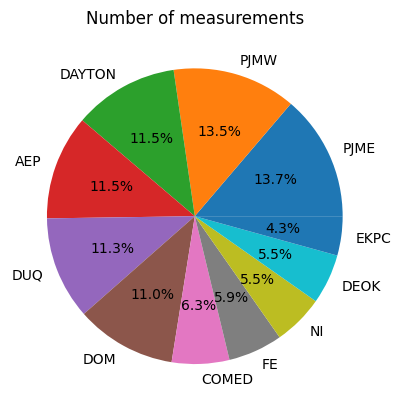

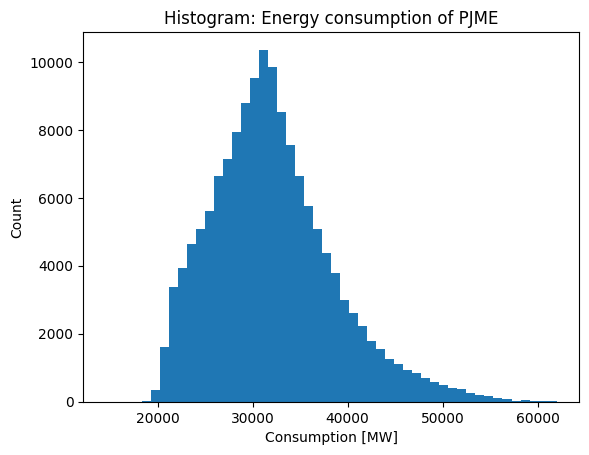

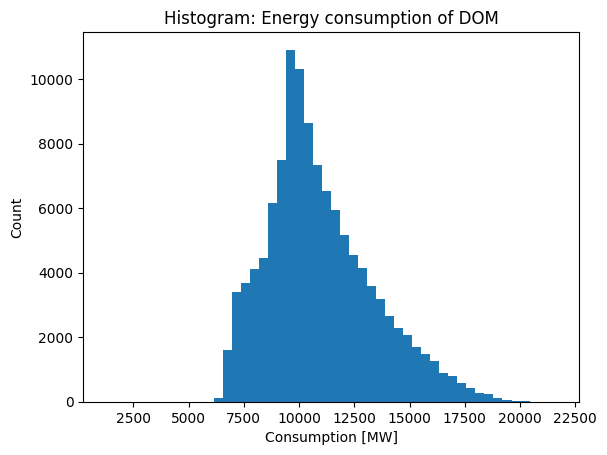

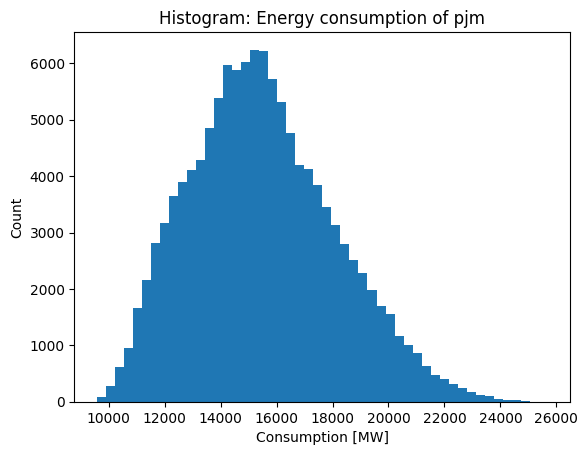

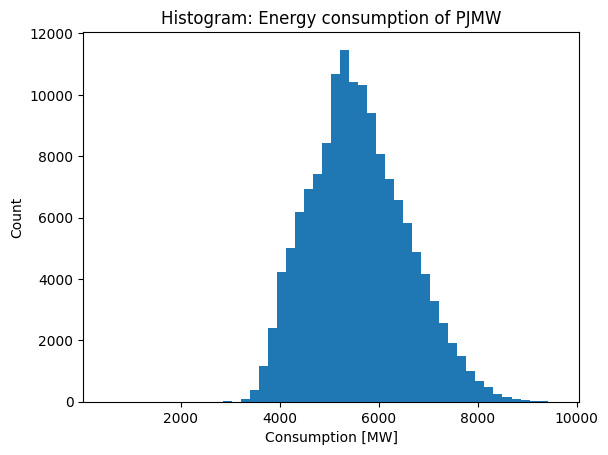

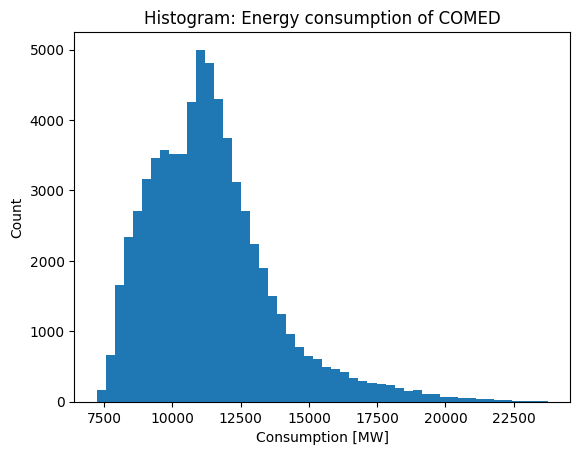

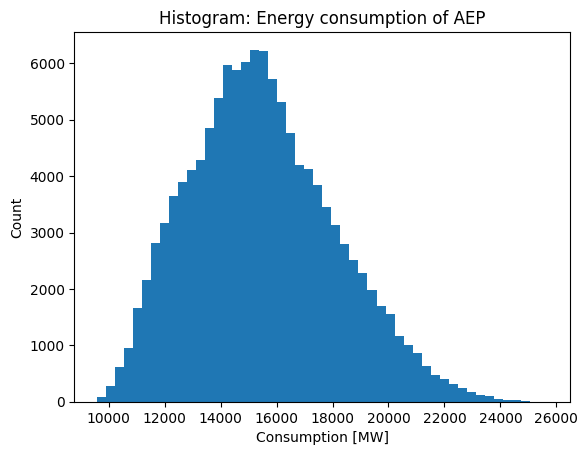

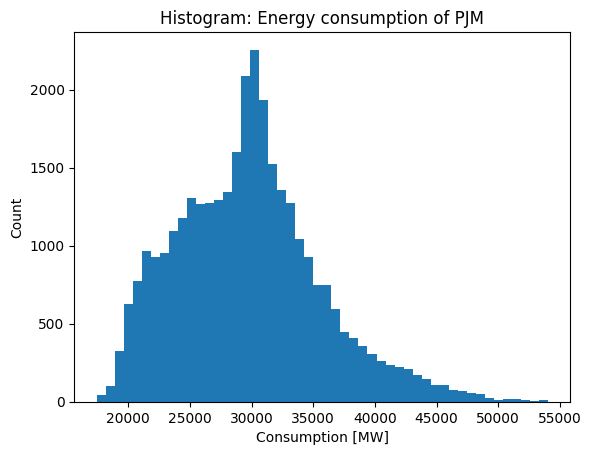

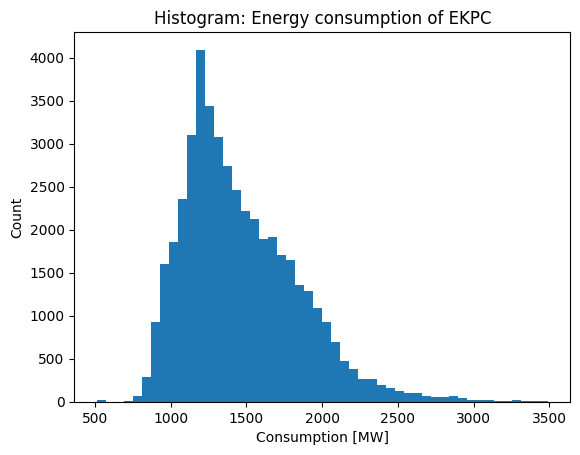

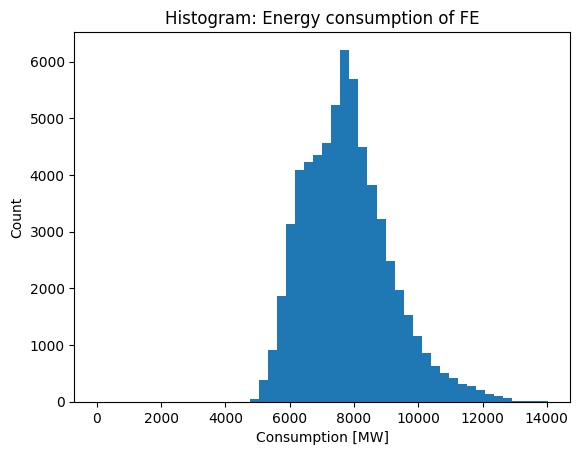

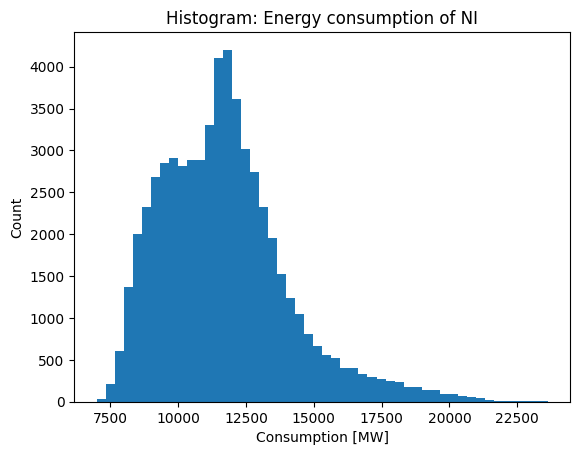

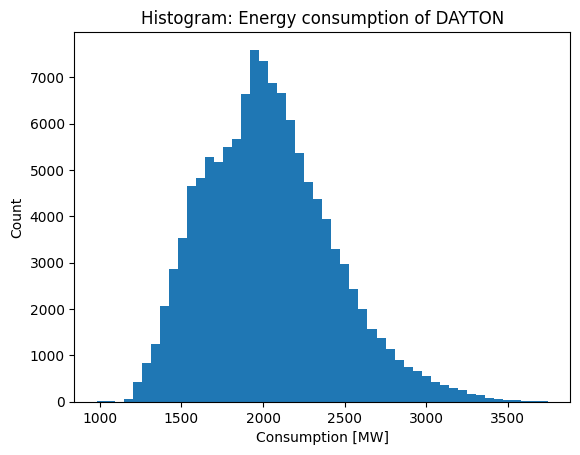

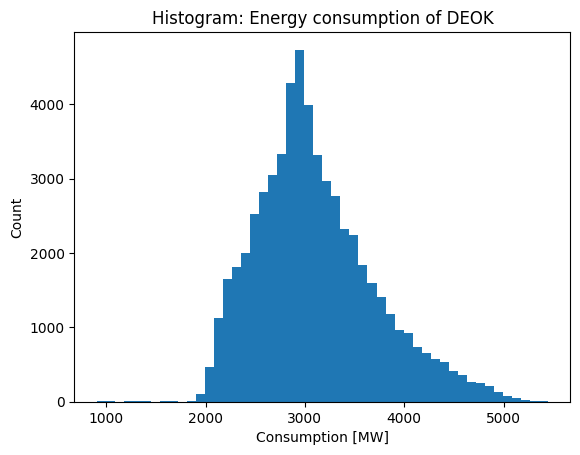

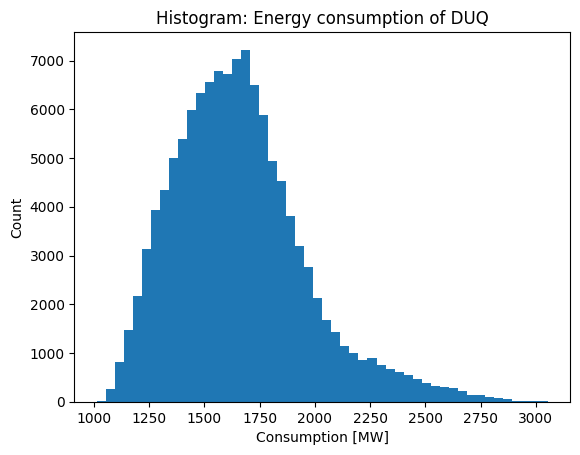

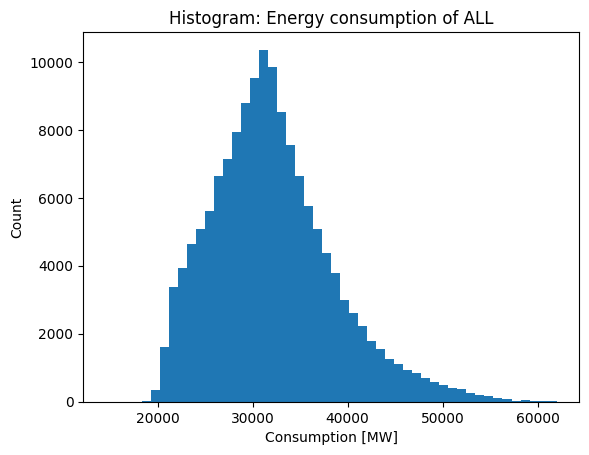

In [54]:
# counts = [ df.count() for df in dfs.items() ]
value_counts = dfs['ALL']["Provider"].value_counts()

# dir(value_counts)
# value_counts[0]


# value_counts["Provider"]
fig, ax = plt.subplots()
ax.pie( [ v[1] for v in value_counts.items()] , autopct='%1.1f%%', labels=[v[0] for v in value_counts.items()])
# ax.legend(loc='upper left')
ax.set_title("Number of measurements")

# Rozkład normalny wszystkiego i per plik
# Histogram dla każdego pliku osobno i całości
for s, df in dfs.items():
    fig, ax = plt.subplots()
    ax.hist(df.iloc[:, 1], bins=50)
    ax.set_ylabel('Count')
    ax.set_xlabel('Consumption [MW]')
    ax.set_title(f'Histogram: Energy consumption of {s}')
    # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.show()


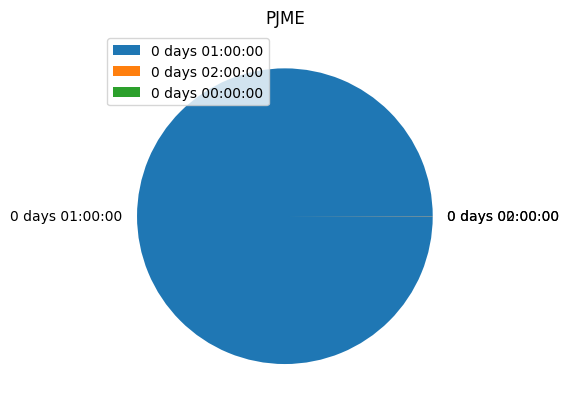

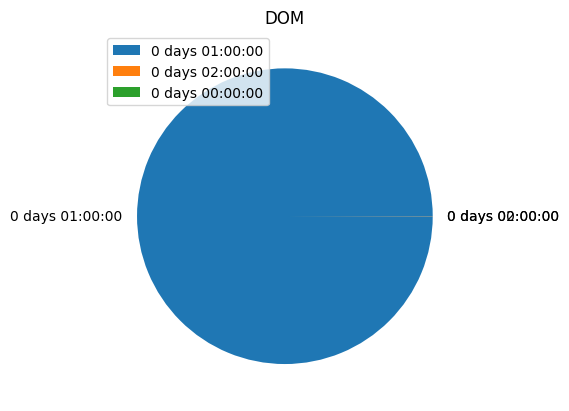

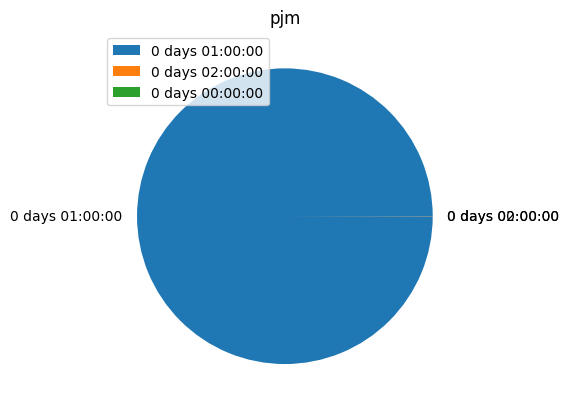

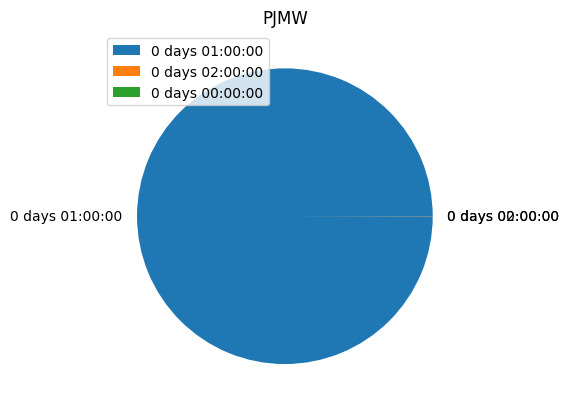

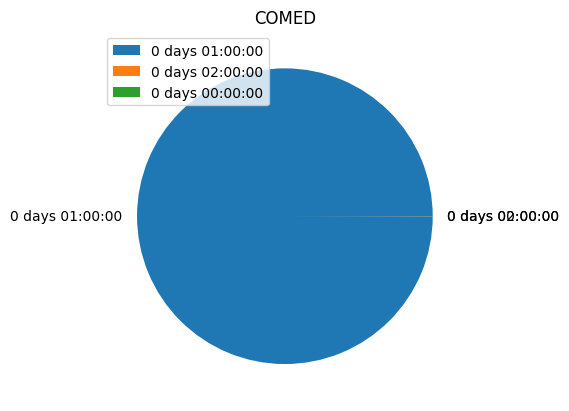

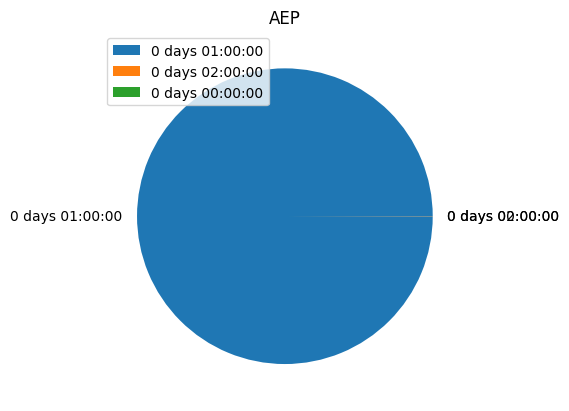

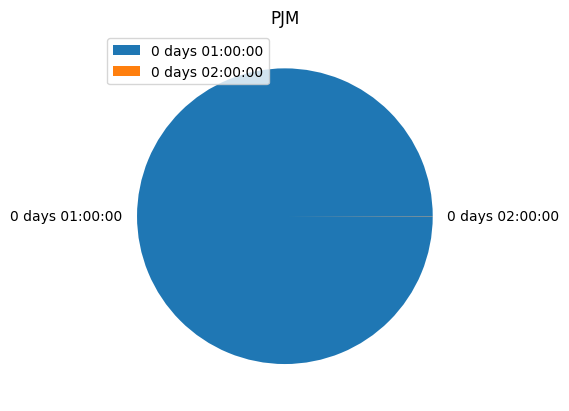

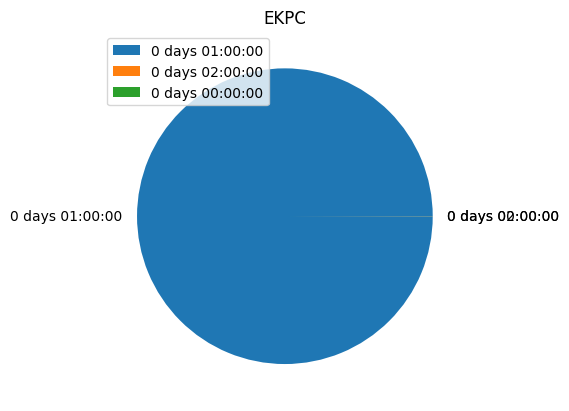

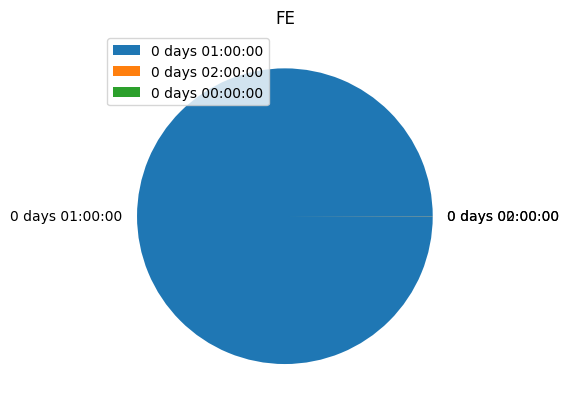

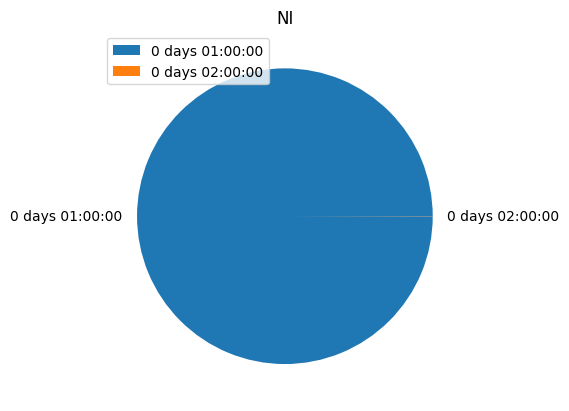

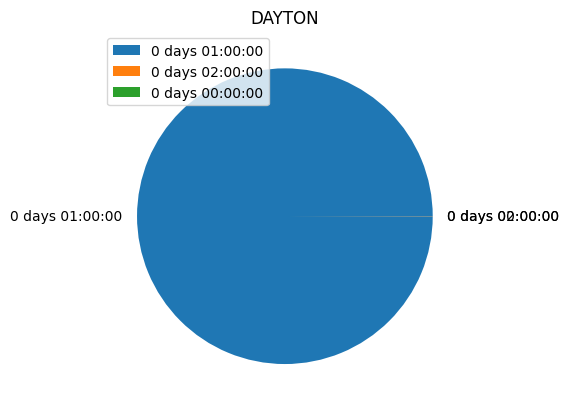

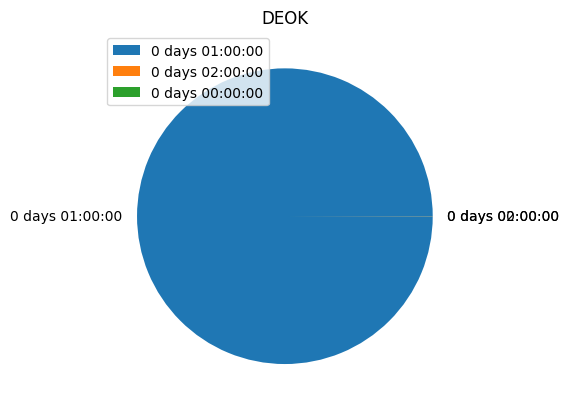

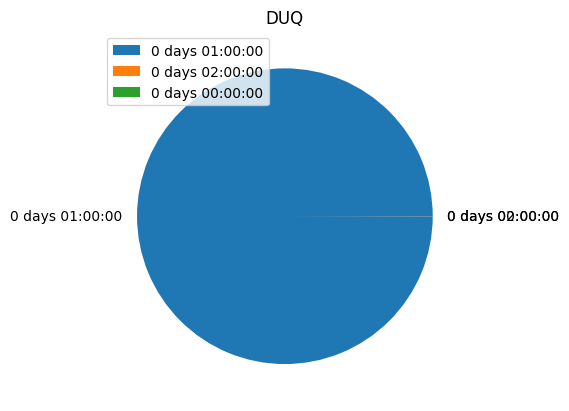

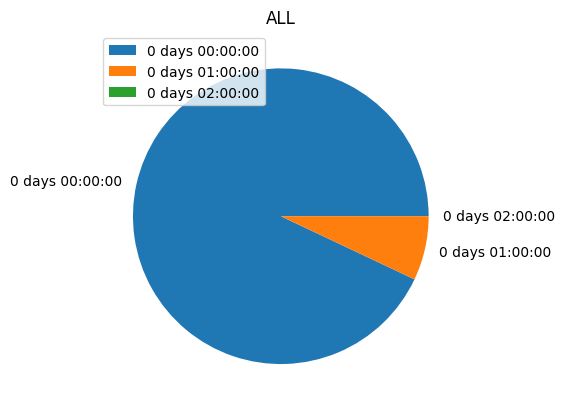

In [154]:
# Ciągłość czasowa wszystkiego i per plik
def check_consistency(df):
    return df['Datetime'].sort_values().diff().value_counts()

for name, df in dfs.items():
    # print('-----', name, '---------')
    consistency = check_consistency(df) 
    # display(consistency)
    fig, ax = plt.subplots()
    ax.pie(consistency, labels=list(consistency.keys()))
    ax.legend(loc='upper left')
    ax.set_title(name)
    # break

In [53]:
# Check for null values
for file_name, df in dfs.items():
    for column in val.columns:
        if any(val[column].isnull()):
            print(f"Column {column} in {file_name} contains null values")
        else:
            print(f"Column {column} in {file_name} contains no null values")

Column Datetime in PJME contains no null values
Column PJME_MW in PJME contains no null values
Column Datetime in DOM contains no null values
Column PJME_MW in DOM contains no null values
Column Datetime in pjm contains no null values
Column PJME_MW in pjm contains no null values
Column Datetime in PJMW contains no null values
Column PJME_MW in PJMW contains no null values
Column Datetime in COMED contains no null values
Column PJME_MW in COMED contains no null values
Column Datetime in AEP contains no null values
Column PJME_MW in AEP contains no null values
Column Datetime in PJM contains no null values
Column PJME_MW in PJM contains no null values
Column Datetime in EKPC contains no null values
Column PJME_MW in EKPC contains no null values
Column Datetime in FE contains no null values
Column PJME_MW in FE contains no null values
Column Datetime in NI contains no null values
Column PJME_MW in NI contains no null values
Column Datetime in DAYTON contains no null values
Column PJME_MW